In [72]:
import numpy as np
import pylab as pl
import pandas as pd
from matplotlib import pyplot as plt

## Import metadata and clean ()
metadata = np.loadtxt('HT_Sensor_metadata.dat', skiprows=1, dtype=str)
metadata_aux = np.array( metadata[:,[0,3,4]], dtype=float )

## Import dataset
dataset = np.loadtxt('HT_Sensor_dataset.dat', skiprows=1)

In [73]:
event = 17
false_event = 19

In [74]:
## Get desired metadata for **event**
event_md = metadata_aux[event]
start_time = event_md[1] #start time
end_time = start_time + event_md[2] #duration

## Get desired metadata for **false_event**
false_event_md = metadata_aux[false_event]
false_start_time = false_event_md[1] #start time
false_end_time = false_start_time + false_event_md[2] #duration



In [75]:
all_temp = dataset[:,[0,1,10]] #all id's, time's, and temps

In [76]:
event_data = all_temp[all_temp[:,0]==event,1:] #get all instances with id of **event**
event_data[:,0] += start_time # set time atribute to time from metadata

false_data = all_temp[all_temp[:,0]==false_event,1:] #get all instances with id of **false_event**
false_data[:,0] += false_start_time # set time atribute to time from metadata

In [77]:
print(event_data[:10])
print('---------------------------')
print(false_data[:10])

[[ 5.540107 27.9875  ]
 [ 5.540385 27.9868  ]
 [ 5.540663 27.9862  ]
 [ 5.540941 27.9856  ]
 [ 5.541219 27.9851  ]
 [ 5.541509 27.9846  ]
 [ 5.541787 27.9841  ]
 [ 5.542065 27.9837  ]
 [ 5.542343 27.9834  ]
 [ 5.542621 27.9831  ]]
---------------------------
[[21.540074 27.0557  ]
 [21.540352 27.0551  ]
 [21.54063  27.0547  ]
 [21.540908 27.0542  ]
 [21.541193 27.0538  ]
 [21.541471 27.0534  ]
 [21.541749 27.0503  ]
 [21.542027 27.0474  ]
 [21.542305 27.0448  ]
 [21.542592 27.0424  ]]


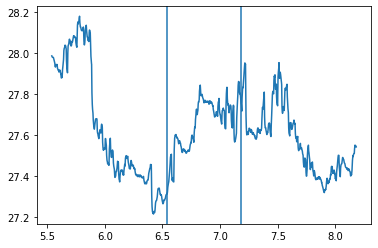

In [78]:
plt.plot(event_data[:,0],event_data[:,1])
plt.axvline(start_time)
plt.axvline(end_time)
plt.show()

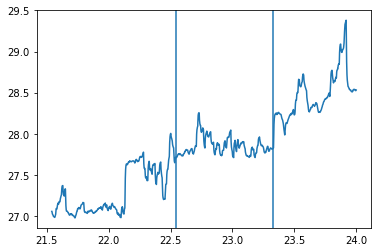

In [79]:
plt.plot(false_data[:,0],false_data[:,1])
plt.axvline(false_start_time)
plt.axvline(false_end_time)
plt.show()

In [80]:
#subset of metadata table
test = metadata[:10]
event = test[test[:,2] == 'banana']

In [81]:
print(test[:10])
print('---------------------------------------------')
print(event[:10])

[['0' '07-04-15' 'banana' '13.49' '1.64']
 ['1' '07-05-15' 'wine' '19.61' '0.54']
 ['2' '07-06-15' 'wine' '19.99' '0.66']
 ['3' '07-09-15' 'banana' '6.49' '0.72']
 ['4' '07-09-15' 'wine' '20.07' '0.53']
 ['5' '07-10-15' 'banana' '16.38' '0.80']
 ['6' '07-11-15' 'wine' '11.19' '0.95']
 ['7' '07-12-15' 'banana' '8.17' '0.49']
 ['8' '07-12-15' 'wine' '10.41' '1.17']
 ['9' '07-15-15' 'banana' '9.35' '0.61']]
---------------------------------------------
[['0' '07-04-15' 'banana' '13.49' '1.64']
 ['3' '07-09-15' 'banana' '6.49' '0.72']
 ['5' '07-10-15' 'banana' '16.38' '0.80']
 ['7' '07-12-15' 'banana' '8.17' '0.49']
 ['9' '07-15-15' 'banana' '9.35' '0.61']]


In [92]:
event_ids = event[:,0]
event_ids

array(['0', '3', '5', '7', '9'], dtype='<U10')

In [108]:
all_temp = dataset[:,[0,1,10]] #all id's, time's, and temps
all_temp[:10]

array([[ 0.      , -0.99975 , 26.2257  ],
       [ 0.      , -0.999472, 26.2308  ],
       [ 0.      , -0.999194, 26.2365  ],
       [ 0.      , -0.998916, 26.2416  ],
       [ 0.      , -0.998627, 26.2462  ],
       [ 0.      , -0.998349, 26.2503  ],
       [ 0.      , -0.998071, 26.2541  ],
       [ 0.      , -0.997793, 26.2575  ],
       [ 0.      , -0.997515, 26.2606  ],
       [ 0.      , -0.997227, 26.2626  ]])

In [138]:
data = all_temp[np.in1d(all_temp[:,0],event_ids),:]

In [206]:
all_event_data = []
for i in event_ids:
    x = all_temp[np.in1d(all_temp[:,0],float(i))]
    all_event_data.append(x)
all_event_data

[array([[ 0.      , -0.99975 , 26.2257  ],
        [ 0.      , -0.999472, 26.2308  ],
        [ 0.      , -0.999194, 26.2365  ],
        ...,
        [ 0.      ,  2.634172, 26.145   ],
        [ 0.      ,  2.63445 , 26.1446  ],
        [ 0.      ,  2.634728, 26.1441  ]]),
 array([[ 3.      , -0.999881, 26.3565  ],
        [ 3.      , -0.999603, 26.3559  ],
        [ 3.      , -0.999325, 26.3553  ],
        ...,
        [ 3.      ,  1.719442, 25.0138  ],
        [ 3.      ,  1.71972 , 25.0144  ],
        [ 3.      ,  1.719998, 25.0149  ]]),
 array([[ 5.      , -0.999859, 26.779   ],
        [ 5.      , -0.999581, 26.7791  ],
        [ 5.      , -0.999291, 26.7792  ],
        ...,
        [ 5.      ,  1.799335, 26.9276  ],
        [ 5.      ,  1.799613, 26.9288  ],
        [ 5.      ,  1.799899, 26.9299  ]]),
 array([[ 7.      , -0.999929, 26.6532  ],
        [ 7.      , -0.999651, 26.6538  ],
        [ 7.      , -0.999363, 26.6544  ],
        ...,
        [ 7.      ,  1.489328, 26.1094 

In [227]:
items = [item for item in all_event_data]

[array([[ 0.      , -0.99975 , 26.2257  ],
        [ 0.      , -0.999472, 26.2308  ],
        [ 0.      , -0.999194, 26.2365  ],
        ...,
        [ 0.      ,  2.634172, 26.145   ],
        [ 0.      ,  2.63445 , 26.1446  ],
        [ 0.      ,  2.634728, 26.1441  ]]),
 array([[ 3.      , -0.999881, 26.3565  ],
        [ 3.      , -0.999603, 26.3559  ],
        [ 3.      , -0.999325, 26.3553  ],
        ...,
        [ 3.      ,  1.719442, 25.0138  ],
        [ 3.      ,  1.71972 , 25.0144  ],
        [ 3.      ,  1.719998, 25.0149  ]]),
 array([[ 5.      , -0.999859, 26.779   ],
        [ 5.      , -0.999581, 26.7791  ],
        [ 5.      , -0.999291, 26.7792  ],
        ...,
        [ 5.      ,  1.799335, 26.9276  ],
        [ 5.      ,  1.799613, 26.9288  ],
        [ 5.      ,  1.799899, 26.9299  ]]),
 array([[ 7.      , -0.999929, 26.6532  ],
        [ 7.      , -0.999651, 26.6538  ],
        [ 7.      , -0.999363, 26.6544  ],
        ...,
        [ 7.      ,  1.489328, 26.1094 

In [228]:
items[0]

array([[ 0.      , -0.99975 , 26.2257  ],
       [ 0.      , -0.999472, 26.2308  ],
       [ 0.      , -0.999194, 26.2365  ],
       ...,
       [ 0.      ,  2.634172, 26.145   ],
       [ 0.      ,  2.63445 , 26.1446  ],
       [ 0.      ,  2.634728, 26.1441  ]])

<function matplotlib.pyplot.show(*args, **kw)>

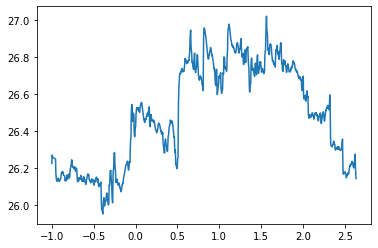

In [232]:
df = all_event_data[0]
time = [item[1] for item in df]
temp = [item[2] for item in df]

plt.plot(time,temp)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

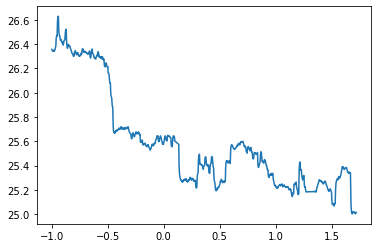

In [237]:
df = all_event_data[1]
time = [item[1] for item in df]
temp = [item[2] for item in df]

plt.plot(time,temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

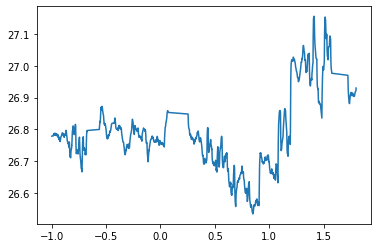

In [238]:
df = all_event_data[2]
time = [item[1] for item in df]
temp = [item[2] for item in df]

plt.plot(time,temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

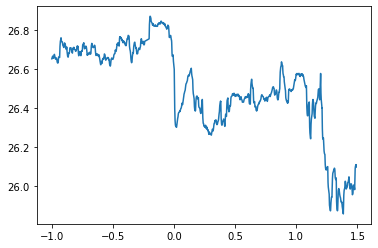

In [239]:
df = all_event_data[3]
time = [item[1] for item in df]
temp = [item[2] for item in df]

plt.plot(time,temp)
plt.show